In [1]:
import pandas as pd
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("Vinom/ClimateChangeQA", split='train[:2000]')  # Limit to 2000 rows

# Convert to DataFrame
df = pd.DataFrame(dataset)

# Inspect the dataset
print(df.columns)
print(df.head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1277 [00:00<?, ? examples/s]

Index(['answer', 'question'], dtype='object')
                                              answer  \
0  Ocean acidification, caused by the absorption ...   
1  Deforestation contributes to climate change by...   
2  Climate change can disrupt the habitats and fo...   
3  Climate change can contribute to the increase ...   
4  Melting polar ice caps can result in the rise ...   

                                            question  
0  What are the potential consequences of ocean a...  
1  What role does deforestation play in exacerbat...  
2  How can climate change impact the migration pa...  
3  How does climate change affect the frequency a...  
4  How can melting polar ice caps impact global s...  


In [3]:
pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 16.0 MB/s eta 0:00:00


In [4]:
import os
import numpy as np
from langchain_openai import AzureOpenAIEmbeddings
from sklearn.preprocessing import normalize

# Azure OpenAI Configuration
os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2023-05-15"
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://insideout.openai.azure.com/"
os.environ["OPENAI_API_KEY"] = "KEY" #removed for privacy
os.environ["OPENAI_EMBEDDINGS_DEPLOYMENT"] = "text-embedding-3-small"

# Initialize the embeddings model
embeddings = AzureOpenAIEmbeddings(deployment=os.environ["OPENAI_EMBEDDINGS_DEPLOYMENT"])

# Embed the dataset
def embed_texts(texts):
    return np.array([embeddings.embed_query(text) for text in texts])

# Embed the 'question' column
embedded_data = embed_texts(df['question'].tolist())

# Normalize the embeddings
embedded_data = normalize(embedded_data)

# Save the embeddings
np.save('embedded_data.npy', embedded_data)


<ipython-input-5-c54e7bbbfa96>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=5, cmap='viridis')


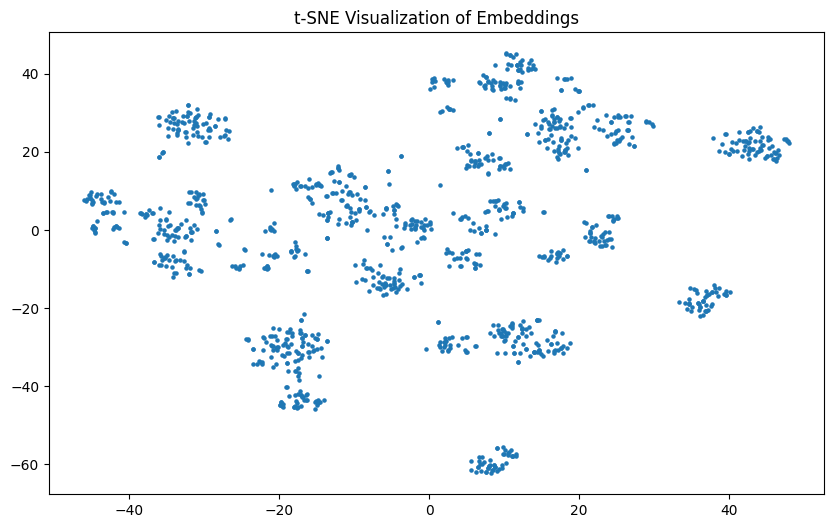

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load the embeddings
embedded_data = np.load('embedded_data.npy')

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embedded_data)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=5, cmap='viridis')
plt.title('t-SNE Visualization of Embeddings')
plt.show()

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to perform a search
def search(query, embedded_data, top_k=5):
    query_vector = embeddings.embed_query(query)
    query_vector = np.array(query_vector).reshape(1, -1)
    similarities = cosine_similarity(query_vector, embedded_data)
    top_indices = similarities[0].argsort()[-top_k:][::-1]
    return df.iloc[top_indices]

# Example search
query = "How does climate change affect polar bears?"
results = search(query, embedded_data)

print(results)

                                                answer  \
738  Climate change affects the behavior and migrat...   
51   Climate change can alter the migration pattern...   
718  Climate change impacts the migration patterns ...   
749  Climate change can disrupt the intricate balan...   
760  Climate change can affect the migration patter...   

                                              question  
738  How does climate change affect the behavior an...  
51   How does climate change affect the migration p...  
718  How does climate change affect the migration p...  
749  How does climate change affect the intricate b...  
760  How does climate change affect the migration p...  
